### First Portion of Submission

Import requisite libraries

In [4]:
import pandas as pd
import numpy as np

Read data on all Canadian postal codes starting with M from the Wikipedia page

In [5]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M", header=0)
df = dfs[0]

Drop all rows with an unassigned borough, then set remaining unassigned neighbourhoods to the value of their borough.

In [6]:
df_drop = df[df.Borough != 'Not assigned']
df_drop.Neighbourhood = np.where(df_drop.Neighbourhood == 'Not assigned', df_drop.Borough, df_drop.Neighbourhood)

C:\Users\yuri.kinakin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Concatenate neighbourhoods with same borough into a single cell, then rename the colums to their proper names.

In [18]:
df_join = df_drop.groupby(['Postcode','Borough'], as_index=False)['Neighbourhood'].apply(', '.join).reset_index()
df_join.columns = ['PostalCode','Borough','Neighbourhood']

In [19]:
df_join.shape

(103, 3)

### Second Portion of Submission

Load lat/long data from csv archive

In [11]:
df_latlong = pd.read_csv("https://cocl.us/Geospatial_data", header=0)

Merge lat/long dataframe with postal code dataframe. 

In [29]:
df_joinll = pd.merge(df_join, df_latlong, left_on='PostalCode', right_on='Postal Code', how = 'left')
df_joinll.drop(columns = ['Postal Code']).head(12)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


### Third Portion of Submission

Import libraries

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

import folium
import json

Plot data prior to clustering.

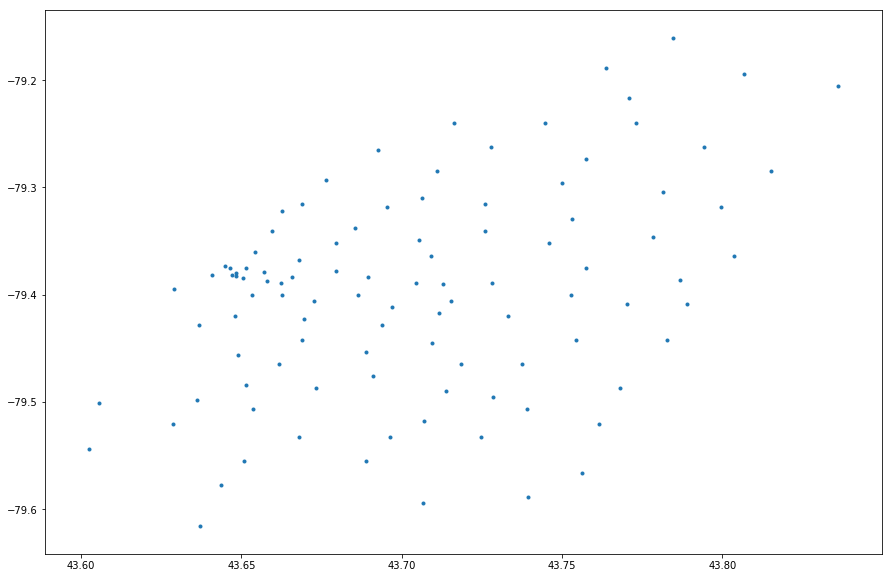

In [31]:
plt.figure(figsize=(15, 10))
plt.scatter(df_joinll.Latitude, df_joinll.Longitude, marker='.')

Run K means clustering on the lat/long data for k = 4

In [35]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(df_joinll[['Latitude','Longitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Find cluster centers

In [36]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 43.76342274, -79.25682511],
       [ 43.74254792, -79.41366641],
       [ 43.68059059, -79.52478493],
       [ 43.66807421, -79.37315645]])

Plot data along with cluster centers

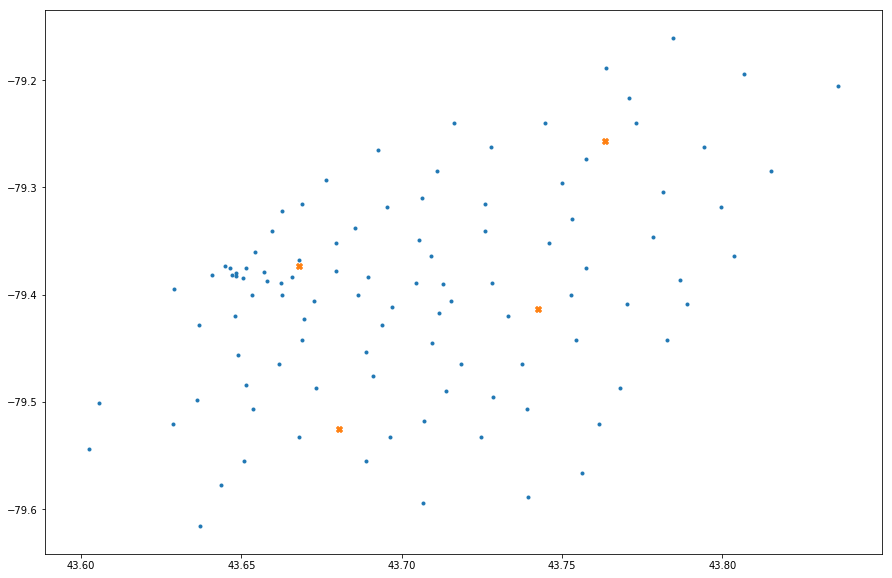

In [42]:
plt.figure(figsize=(15, 10))
plt.scatter(df_joinll.Latitude, df_joinll.Longitude, marker='.')
plt.scatter(k_means_cluster_centers[:,0],k_means_cluster_centers[:,1], marker='X')

Find centre for map

In [46]:
latitude = df_joinll.loc[:,"Latitude"].mean()
longitude = df_joinll.loc[:,"Longitude"].mean()

Create map

In [52]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

In [54]:
for lat, long in zip(df_joinll['Latitude'], df_joinll['Longitude']):
    folium.CircleMarker(
        [lat, long],
        radius=5,).add_to(map_clusters)

In [56]:
map_clusters